In [1]:
symbols = ["NSE:SIEMENS-EQ", "BSE:SIEMENS-A"]

In [2]:
import numpy as np
import time
import matplotlib.pyplot as plt
import scipy as sp
import yfinance as yf
import statsmodels.tsa.stattools
import pandas as pd
import seaborn as sns
from tqdm import tqdm
from statsmodels.regression.linear_model import OLS
import statsmodels.api as sm
from statsmodels.tsa.ar_model import AutoReg
from scipy.stats import norm

app_name = 'trader_bot_1'
app_id = 'HMNTZU1772-100'
secret_id = 'E5A2614XVJ'

# Import the required module from the fyers_apiv3 package
from fyers_apiv3 import fyersModel

# Replace these values with your actual API credentials
client_id = app_id
secret_key = secret_id
redirect_uri = "https://www.google.com/"
response_type = "code"  
state = "iamatrader"

# Create a session model with the provided credentials
session = fyersModel.SessionModel(
    client_id=client_id,
    secret_key=secret_key,
    redirect_uri=redirect_uri,
    response_type=response_type,
    state = state
)

# Generate the auth code using the session model
response = session.generate_authcode()

# Print the auth code received in the response
print(response)

https://api-t1.fyers.in/api/v3/generate-authcode?client_id=HMNTZU1772-100&redirect_uri=https%3A%2F%2Fwww.google.com%2F&response_type=code&state=iamatrader


In [3]:
# Extract the auth_code embedded in the Google url obtained by redirecting via the above result
auth_code = "eyJ0eXAiOiJKV1QiLCJhbGciOiJIUzI1NiJ9.eyJpc3MiOiJhcGkubG9naW4uZnllcnMuaW4iLCJpYXQiOjE3MTkwOTk5MzcsImV4cCI6MTcxOTEyOTkzNywibmJmIjoxNzE5MDk5MzM3LCJhdWQiOiJbXCJ4OjBcIiwgXCJ4OjFcIiwgXCJ4OjJcIiwgXCJkOjFcIiwgXCJkOjJcIiwgXCJ4OjFcIiwgXCJ4OjBcIl0iLCJzdWIiOiJhdXRoX2NvZGUiLCJkaXNwbGF5X25hbWUiOiJYUzg1NDM1Iiwib21zIjoiSzEiLCJoc21fa2V5IjoiMzk4MWY0MjNmMGJkZWI3ZTM3M2FlY2M0YmRmOWVjZTc0ODJiYjA0NzhkOGJlNDNmZmYwMDQ3MGUiLCJub25jZSI6IiIsImFwcF9pZCI6IkhNTlRaVTE3NzIiLCJ1dWlkIjoiZDIzZGRlNWRjZGVjNDFlMjg0YjI2MTEzOTJkOTNlN2IiLCJpcEFkZHIiOiIwLjAuMC4wIiwic2NvcGUiOiIifQ.oPBs8IbIpWqPZG3FlqUGVwKpOOARDgrpqBkOIp04CrI"

In [4]:
response_type = "code"
grant_type = "authorization_code"  

# Create a session object to handle the Fyers API authentication and token generation
session = fyersModel.SessionModel(
    client_id=client_id,
    secret_key=secret_key, 
    redirect_uri=redirect_uri, 
    response_type=response_type, 
    grant_type=grant_type
)

# Set the authorization code in the session object
session.set_token(auth_code)

# Generate the access token using the authorization code
response = session.generate_token()

# Extract the access token and refresh token
access_token = response["access_token"]
refresh_token = response["refresh_token"]

# Print the response, which should contain the access token and other details
print(response)

{'s': 'ok', 'code': 200, 'message': '', 'access_token': 'eyJ0eXAiOiJKV1QiLCJhbGciOiJIUzI1NiJ9.eyJpc3MiOiJhcGkuZnllcnMuaW4iLCJpYXQiOjE3MTkwOTk5NjMsImV4cCI6MTcxOTEwMjYwMywibmJmIjoxNzE5MDk5OTYzLCJhdWQiOlsieDowIiwieDoxIiwieDoyIiwiZDoxIiwiZDoyIiwieDoxIiwieDowIl0sInN1YiI6ImFjY2Vzc190b2tlbiIsImF0X2hhc2giOiJnQUFBQUFCbWQySTdCZHlSdm9yeGdnWTZvdFoySWtuOW40VVluMm5KU29ORldORElnY01oanRZUlpWZm9ZN3djbUpaSHVEUDBSVGJfa3BYZnJhVzdyY1NuMXZ5Mks4Z3JTUjBFcHZ2UFVWZ0J3VWJqYk1BajFfVT0iLCJkaXNwbGF5X25hbWUiOiJTSURESEFSVEhBICBSQUpFRVYiLCJvbXMiOiJLMSIsImhzbV9rZXkiOiIzOTgxZjQyM2YwYmRlYjdlMzczYWVjYzRiZGY5ZWNlNzQ4MmJiMDQ3OGQ4YmU0M2ZmZjAwNDcwZSIsImZ5X2lkIjoiWFM4NTQzNSIsImFwcFR5cGUiOjEwMCwicG9hX2ZsYWciOiJOIn0.Ke5WqLZZJzfu4qo86wo55rtGZtSIDq_JK80F0oKBzPI', 'refresh_token': 'eyJ0eXAiOiJKV1QiLCJhbGciOiJIUzI1NiJ9.eyJpc3MiOiJhcGkuZnllcnMuaW4iLCJpYXQiOjE3MTkwOTk5NjMsImV4cCI6MTcyMDMxMjIwNCwibmJmIjoxNzE5MDk5OTYzLCJhdWQiOlsieDowIiwieDoxIiwieDoyIiwiZDoxIiwiZDoyIiwieDoxIiwieDowIl0sInN1YiI6InJlZnJlc2hfdG9rZW4iLCJhdF9oYXNoIjoiZ0FBQUFBQ

In [5]:
import os

# Initialize the FyersModel instance with your client_id, access_token, and enable async mode
fyers = fyersModel.FyersModel(client_id=client_id, is_async=False, token=access_token, log_path=os.getcwd())

# Make a request to get the user profile information
response = fyers.get_profile()
print(response)

{'s': 'ok', 'code': 200, 'message': '', 'data': {'fy_id': 'XS85435', 'name': 'SIDDHARTHA  RAJEEV', 'image': None, 'display_name': None, 'pin_change_date': '01-06-2024 23:32:35', 'email_id': 'sidsr003@gmail.com', 'pwd_change_date': None, 'PAN': '---------', 'mobile_number': '7619527676', 'totp': False, 'pwd_to_expire': 90}}


      NSE:SIEMENS-EQ  BSE:SIEMENS-A
0            7428.40        7436.75
1            7420.00        7436.15
2            7432.80        7423.25
3            7441.90        7440.00
4            7436.00        7430.95
...              ...            ...
2245         7788.00        7780.05
2246         7787.00        7783.75
2247         7786.05        7783.75
2248         7787.00        7790.00
2249         7787.00        7790.00

[2250 rows x 2 columns]


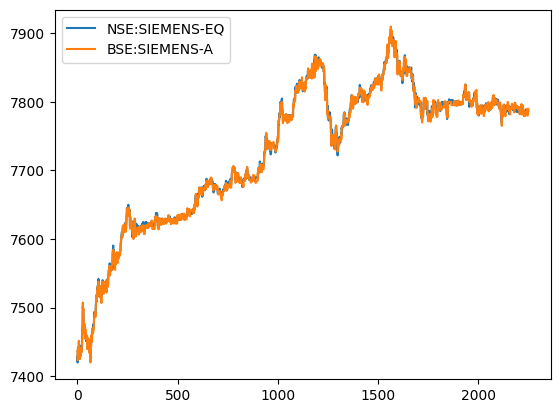

In [62]:
import pandas as pd
import datetime as dt

# Define query

start_date = dt.date.today()-dt.timedelta(9)
end_date = dt.date.today()-dt.timedelta(9)

# Retrieve data

data = pd.DataFrame()

def retrieve_batch(query_data):
    response = fyers.history(data=query_data)
    temp_data = pd.DataFrame(response['candles'])
    temp_data.columns = ['Date', 'Open', 'High', 'Low', 'Close', 'Volume']
    temp_data['Date'] = pd.to_datetime(temp_data['Date'], unit='s')
    temp_data.Date = temp_data.Date.dt.tz_localize('UTC').dt.tz_convert('Asia/Kolkata')
    temp_data['Date'] = temp_data['Date'].dt.tz_localize(None)
    return temp_data

for symbol in symbols:
    symbol_data = pd.DataFrame(columns=[symbol])
    query_data = {
        "symbol":symbol,
        "resolution":"10S",
        "date_format":"1",
        "range_from":start_date,
        "range_to": end_date,
        "cont_flag":"1"
    }
    while(start_date+dt.timedelta(100) <= end_date):
        temp_date = start_date + dt.timedelta(100)
        query_data['range_to'] = temp_date
        temp_data = retrieve_batch(query_data)
        symbol_data = pd.concat([symbol_data, temp_data], axis=0)
        start_date = temp_date + dt.timedelta(1)
    query_data['range_to'] = end_date
    temp_data = retrieve_batch(query_data)
    symbol_data[symbol] = temp_data[['Close']]
    data = pd.concat([data, symbol_data], axis=1)

data.plot()
print(data)
data = data[:]

<Axes: >

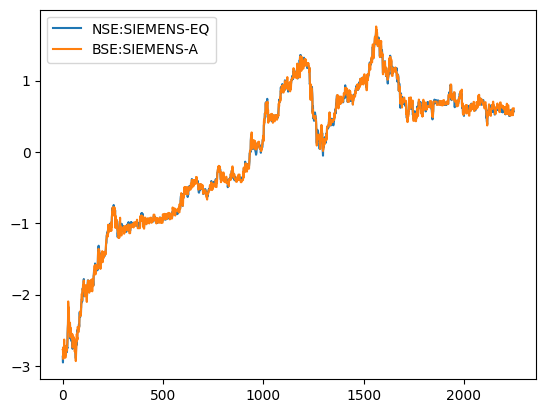

In [63]:
# Now we need to standardize the dataset
means = data.mean(axis=0)
stds = data.std(axis=0)
centered_data = (data-means)/stds
centered_data.plot()

In [64]:
# Now we can compute a square-sum "correlation" type quantity for each pair:
squared_sums = np.zeros(shape=(len(symbols), len(symbols)))
for i in range(len(symbols)):
    for j in range(len(symbols)):
        squared_sums[i, j] = np.square(centered_data.iloc[:, i].to_numpy()-centered_data.iloc[:, j].to_numpy()).sum()
squared_sums

array([[0.        , 3.78004421],
       [3.78004421, 0.        ]])

<Axes: >

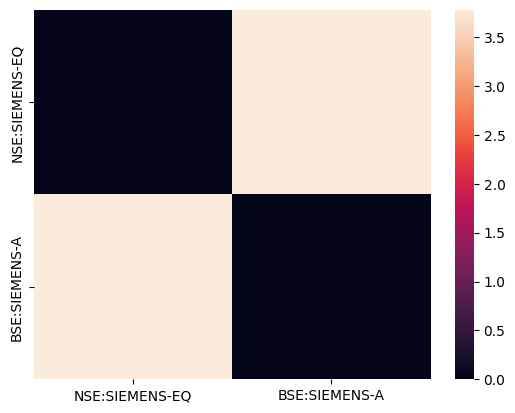

In [65]:
sns.heatmap(squared_sums, xticklabels=symbols, yticklabels=symbols)

[3.78004421]


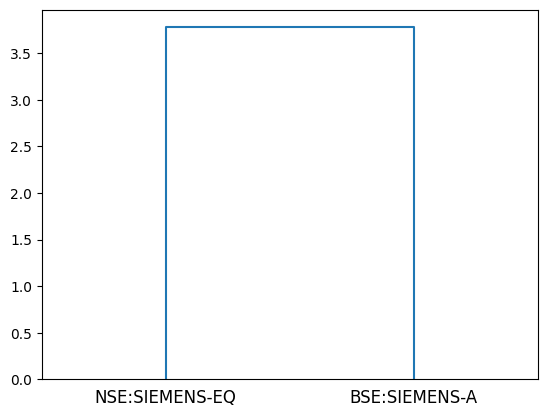

In [66]:
# It would make sense for small values of this sum of differential squares
# to indicate strong correlations between the two assets

# Clearly in this example, Coca Cola (KO) and Pepsi (PEP) have the potential to
# form a good pair in our pair trading strategy

# We can receive further affirmation through a dendrogram to cluster based on these "distances"
condensed_distances = sp.spatial.distance.squareform(squared_sums)
print(condensed_distances)
fig, ax = plt.subplots()
linkage = sp.cluster.hierarchy.linkage(condensed_distances)
dendrogram = sp.cluster.hierarchy.dendrogram(linkage, ax=ax, labels=symbols)

In [67]:
asset_a = symbols[1]
asset_b = symbols[0]

Text(0.5, 1.0, 'Pair Relationship')

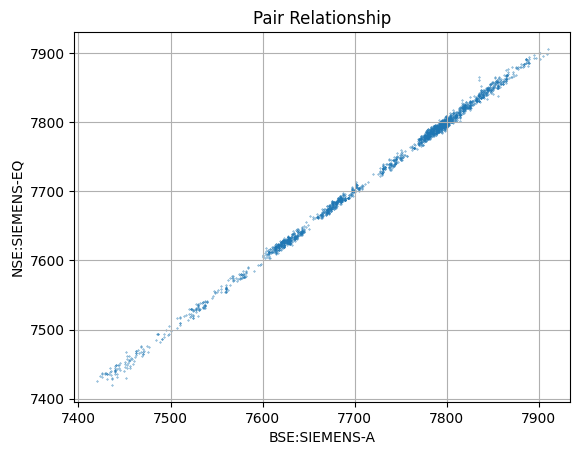

In [68]:
# Let's visualise the relationship between the prices of PEP and KO:
fig, ax = plt.subplots()
ax.scatter(data[asset_a], data[asset_b], s=0.1)
ax.grid(True)
ax.set_xlabel(asset_a)
ax.set_ylabel(asset_b)
ax.set_title('Pair Relationship')

In [69]:
# Fit the pair using ordinary least-squares regression 

from statsmodels.regression.linear_model import OLS
import statsmodels.api as sm
model = sm.OLS(data[asset_b], sm.add_constant(data[asset_a])).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         NSE:SIEMENS-EQ   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 1.336e+06
Date:                Sun, 23 Jun 2024   Prob (F-statistic):               0.00
Time:                        01:58:45   Log-Likelihood:                -6458.8
No. Observations:                2250   AIC:                         1.292e+04
Df Residuals:                    2248   BIC:                         1.293e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            28.2416      6.662      4.239      0.000      15.177      41.306
BSE:SIEMENS-A     0.9965      0.001   1155.768      0.000       0.995       0.998
==============================================================================
Omnibus:                       82.695   Durbin-Watson:                   1.349
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              236.486
Skew:                           0.040   Prob(JB):                     4.44e-52
Kurtosis:                       4.586   Cond. No.                     5.72e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.72e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [70]:
# Clearly, the regression is extraordinary, with the t-statistic p-value being 0.000 (to 3 dp) for the PEP-KO regressor and the 
# Now all we need to do is check whether the quantity PEP - beta_1*KO - beta_0 is indeed stationary (which would be true if the regression premise of 
# PEP = beta_0 + beta_1*KO + epsilon where epsilon~N(0, sigma^2) had been true)

# We use the Augmented Dickey-Fuller (ADF) test to test the difference (spread) for stationarity

beta_0 = model.params[0]
beta_1 = model.params[1]
spread = data[asset_b] - beta_1*data[asset_a] - beta_0
spread = np.array(spread)

from statsmodels.tsa.stattools import adfuller
stationarity_results = adfuller(spread)
test_statistic = stationarity_results[0]
p_value = stationarity_results[1]
print(f"p-value = {p_value}")

p-value = 0.0


Text(0.5, 1.0, 'Pair Relationship')

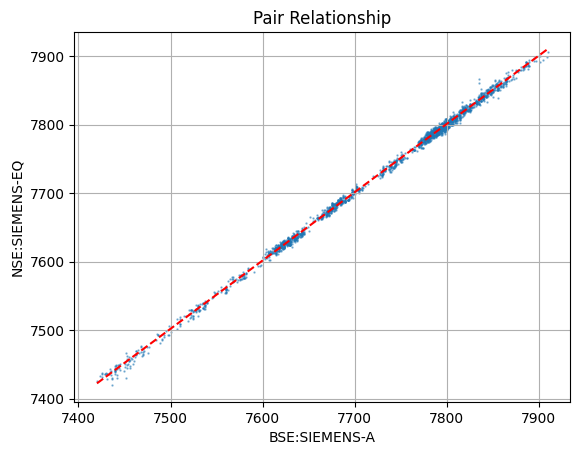

In [71]:
# Let's examine the linear fit

x = np.linspace(np.percentile(data[asset_a], 0), np.percentile(data[asset_a], 100), 100) 
y = beta_0 + beta_1*x

fig, ax = plt.subplots()
ax.scatter(data[asset_a], data[asset_b], s=0.5, alpha=0.5)
ax.plot(x, y, c='red', alpha=1, ls='--')
ax.grid(True)
ax.set_xlabel(asset_a)
ax.set_ylabel(asset_b)
ax.set_title('Pair Relationship')

In [72]:
# We can conclude that stationarity of the pair-spread is accepted at the 2% level of significance

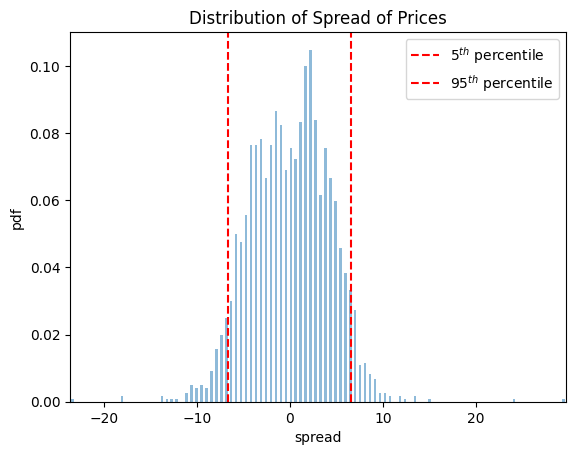

In [73]:
# Now let's visualise a histogram of the spread
fig, ax = plt.subplots()
ax.hist(spread, bins=100, rwidth=0.5, alpha=0.5, density=True)
ax.axvline(np.percentile(spread, 5), label="$5^{th}$ percentile", c='red', ls='--')
ax.axvline(np.percentile(spread, 95), label="$95^{th}$ percentile", c='red', ls='--')
ax.set_xlim(np.percentile(spread, 0), np.percentile(spread, 100))
ax.set_xlabel('spread')
ax.set_ylabel('pdf')
ax.set_title('Distribution of Spread of Prices')
plt.legend()
plt.show()

In [74]:
# Now we are interested in an entry position for a trade. Assuming the spread to be normally distributed,
# we decide to enter the trade at a z-score of 0.7518 and exit the trade at the mean (z-score=0)

In [75]:
# However in order to compute the z-score we need to know the mean and variance. Let's compute the mean and variance  by fitting the spread
# to an AR(1) model and comparing it to an Ornstein-Uhlenbeck process whose discretised version takes the same AR(1) form

# mu is the reversion strength of the OU process and theta is the long term mean to which reversion occurs
# sigma is another parameter in the OU process equation

dt = 1 # days

from statsmodels.tsa.ar_model import AutoReg
model = AutoReg(spread, lags=1, trend='n', seasonal=False, exog=np.ones(len(spread))).fit()
# print(model.summary())
alpha = model.params[1]
beta = model.params[0]
mu = -np.log(beta)/dt
theta = alpha/(1-beta)+1e-6
sigma = np.std(np.array(spread[1:])-alpha-beta*np.array(spread[:-1]))*np.sqrt(2*mu/(1-beta**2))
print("mu = %.3f" % mu)
print("theta = %.3f" % theta)
print("sigma = %4.3f" % sigma)

mu = 1.126
theta = 0.006
sigma = 6.401


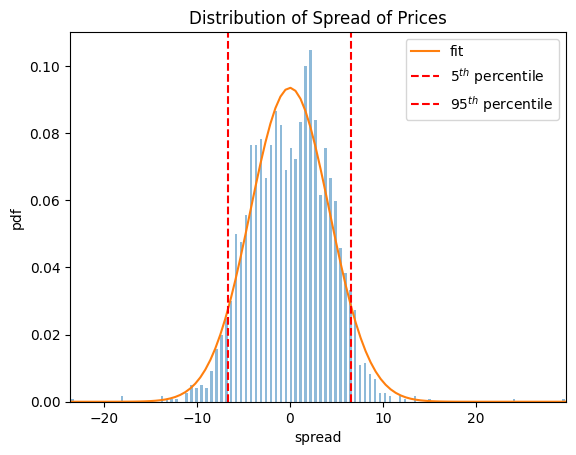

In [76]:
# Now let's visualise the spread fit as if it were a normal distribution with the mean and standard deviation of an Ornstein Uhlenbeck process

from scipy.stats import norm
x = np.linspace(np.percentile(spread, 0), np.percentile(spread, 100), 100)
y = norm.pdf(x, theta, scale=sigma/np.sqrt(2*mu))

fig, ax = plt.subplots()
ax.hist(spread, bins=100, rwidth=0.5, alpha=0.5, density=True)
ax.plot(x, y, label='fit')
ax.axvline(np.percentile(spread, 5), label="$5^{th}$ percentile", c='red', ls='--')
ax.axvline(np.percentile(spread, 95), label="$95^{th}$ percentile", c='red', ls='--')
ax.set_xlim(np.percentile(spread, 0), np.percentile(spread, 100))
ax.set_xlabel('spread')
ax.set_ylabel('pdf')
ax.set_title('Distribution of Spread of Prices')
plt.legend()
plt.show()

In [77]:
# This looks like a good fit! Now let's examine the distribution of half lives to determine the trading window we should care about
# We will use the Ornstein Uhlenbeck parameters obtained by fitting the spread and generate new values by sampling an OU process. This is parametric bootstrapping.

def sample_ou_process(theta, sigma, mu, dt, x):
    x = theta + (x-theta)*np.exp(-mu*dt) + (sigma/np.sqrt(2*mu))*(np.sqrt(1-np.exp(-2*mu*dt)))*np.random.normal()
    return x

mus = []
for i in range(1000):
    sequence = []
    x = spread[0]
    sequence.append(x)
    for j in range(len(spread)-1):
        x = sample_ou_process(theta, sigma, mu, dt, x)
        sequence.append(x)
    sequence = np.array(sequence)

    # Now fit this generated OU sequence as an AR(1) process
    model = AutoReg(sequence, lags=1, trend='n', seasonal=False, exog=np.ones(len(sequence))).fit()
    alpha_temp = model.params[1]
    beta_temp = model.params[0]
    mu_temp = -np.log(beta_temp)/dt
    mus.append(mu_temp)

taus = np.log(2)/mus # half life distribution

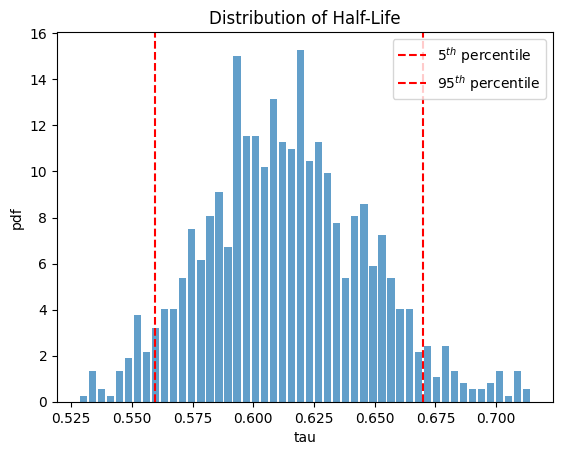

In [78]:
# Visualize the distribution of half-lives

fig, ax = plt.subplots()
ax.hist(taus, density=True, bins=50, rwidth=0.8, alpha=0.7)
ax.set_xlabel('tau')
ax.set_ylabel('pdf')
ax.set_title('Distribution of Half-Life')
ax.axvline(np.percentile(taus, 5), label='$5^{th}$ percentile', c='red', ls='--')
ax.axvline(np.percentile(taus, 95), label='$95^{th}$ percentile', c='red', ls='--')
plt.legend()
plt.show()


In [79]:
# Clearly the holding time lasts over a long period for this pair-spread (~100 days) and has a large variance. 
# We keep this distribution in mind when choosing rolling windows

In [80]:
# Defined based on NSE transactions

def get_regulatory_costs(side, price, quantity):
    flow = price*quantity
    brokerage = min(3*(1e-4)*flow, 20)
    stt_ctt = 0
    stamp_charges = 0
    if side == -1:
        stt_ctt = 2.5*(1e-4)*flow
        stamp_charges = 0
    elif side == 1:
        stt_ctt = 0
        stamp_charges = 3*(1e-5)*flow
    transaction_charges = 3.22*(1e-5)*flow
    sebi_charges = (1e-6)*flow
    gst = 0.18*(brokerage+transaction_charges+sebi_charges)
    total = brokerage + stt_ctt + transaction_charges + gst + sebi_charges + stamp_charges
    return total

In [81]:
# Now we build our backtesting strategy with a rolling window of specified size

# the entry and exit z-statistics
z_entry = 2.5
z_exit = 0
window = 200 # the number of look-back days for statistics (not that if this is far too small, then the standard dev will be zero and cause errors because the price may not change for a few time steps)

# store the prices in a new data frame
pairs_data = data[[asset_a, asset_b]]

# information used t0 make the trading decision and signal changes
prev_z_score = 0 
position = 0
signal = 0
z_scores = []
positions = []

# the number of each stock's shares held
shares_a = 0
shares_b = 0
shares_a_history = []
shares_b_history = []

# the total value held
portfolio = 0
portfolio_history = []

min_order = 10 # minimum number of shares that must be bought

hedge_ratios=[] # a list of the ratio of shares of asset_b and asset_a at each timestep

def close_positions():
    global portfolio, shares_a, shares_b, position
    costs = get_regulatory_costs(-np.sign(shares_b), current_prices[asset_b], abs(shares_b)) + get_regulatory_costs(-np.sign(shares_a), current_prices[asset_a], abs(shares_a))
    portfolio += shares_a*current_prices[asset_a] + shares_b*current_prices[asset_b] - costs
    shares_a = 0
    shares_b = 0
    position = 0

for i in tqdm(range(window, len(spread))):

    moving_model = sm.OLS(pairs_data.iloc[i-window:i][asset_b], sm.add_constant(pairs_data.iloc[i-window:i][asset_a], has_constant='add')).fit() # perform OLS linear regression on the standardized asset prices 
    moving_beta_0 = moving_model.params[0] # intercept
    moving_beta_1 = moving_model.params[1] # slope
    if moving_beta_1 == 0:
        moving_beta_1 = beta_1

    moving_spread = np.array(pairs_data[i-window:i][asset_b])-moving_beta_1*np.array(pairs_data.iloc[i-window:i][asset_a])-moving_beta_0 # compute moving spread
    moving_model = AutoReg(moving_spread, lags=1, trend='n', seasonal=False, exog=np.ones(len(moving_spread))).fit() # fit an autoregression to the window of spread data
    moving_alpha = moving_model.params[1] # constant
    moving_beta = moving_model.params[0] # lag=1 coefficient
    if moving_beta<0 or moving_beta>1:
        moving_beta = beta
    moving_mu = -np.log(moving_beta)/dt # window's mu for OU process
    moving_theta = moving_alpha/(1-moving_beta) # window's theta for OU process
    moving_sigma = np.std(np.array(moving_spread[1:])-moving_alpha-moving_beta*np.array(moving_spread[:-1]))*np.sqrt(2*moving_mu/(1-moving_beta**2)) # window's sigma for OU process

    current_prices = pairs_data.iloc[i] # latest prices
    current_spread = current_prices[asset_b]-moving_beta_1*current_prices[asset_a]-moving_beta_0 # latest spread
    z_score = (current_spread-moving_theta)/(moving_sigma/np.sqrt(2*moving_mu)) # latest z-score
    z_scores.append(z_score)

    # Now generate the trading signals
    if prev_z_score < z_entry and z_score > z_entry and position > -1: # if pair is overbought
        close_positions()
        signal = -1
        position = -1
    elif prev_z_score > -z_entry and z_score < -z_entry and position < 1: # if pair is oversold
        close_positions()
        signal = 1 # long the pair
        position = 1
    elif prev_z_score > z_exit and z_score < z_exit: # if exiting the overbought region
        close_positions()
        signal = 0
        position = 0
    elif prev_z_score < -z_exit and z_score > -z_exit: # if exiting the underbought region
        close_positions()
        signal = 0
        position = 0
    else:
        signal = 0

    # Now execute the trades
    
    # hedge_ratio = 1/moving_beta_1 # compute the hedge ratio (asset_b/asset_a ratio of shares to trade)
    # hedge_ratio = np.clip(hedge_ratio, -2, 2)
    hedge_ratio =1
    shares_a -= signal*min_order # short asset_a for positive delta
    shares_b += hedge_ratio*signal*min_order # long asset_b for positive delta
    costs = get_regulatory_costs(np.sign(signal), current_prices[asset_b], abs(hedge_ratio*signal*min_order)) + get_regulatory_costs(-np.sign(signal), current_prices[asset_a], abs(signal*min_order))
    portfolio -= (hedge_ratio*signal*min_order*current_prices[asset_b] - signal*min_order*current_prices[asset_a]) # update portfolio according to shares bought and sold

    # update z_score 
    prev_z_score = z_score

    shares_a_history.append(shares_a)
    shares_b_history.append(shares_b)
    positions.append(position)
    portfolio_history.append(portfolio)
    hedge_ratios.append(hedge_ratio)

# close all positions
close_positions()
position = 0
shares_a_history.append(shares_a)
shares_b_history.append(shares_b)
portfolio_history.append(portfolio)
positions.append(position)

# convert to numpy arrays for convenience
z_scores = np.array(z_scores)
positions = np.array(positions)
portfolio_history = np.array(portfolio_history)
hedge_ratios = np.array(hedge_ratios)

100%|██████████| 2050/2050 [00:05<00:00, 371.19it/s]


In [82]:
# Generate the trading signal triangles based on when the trading signal changes to +1 or -1
buy_signals = []
sell_signals = []
if positions[0] == 1:
    buy_signals.append(0)
elif positions[0] == -1:
    sell_signals.append(0)
for i in range(1, len(positions)):
    if positions[i] == 1 and positions[i-1] < 1:
        buy_signals.append(i)
    if positions[i] == -1 and positions[i-1] > -1:
        sell_signals.append(i)
buy_signals = np.array(buy_signals)
sell_signals = np.array(sell_signals)

C:\Users\sidsr\AppData\Local\Temp\ipykernel_23024\2106352446.py:30: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  axs[3].set_ylim([np.min(hedge_ratios), np.max(hedge_ratios)])


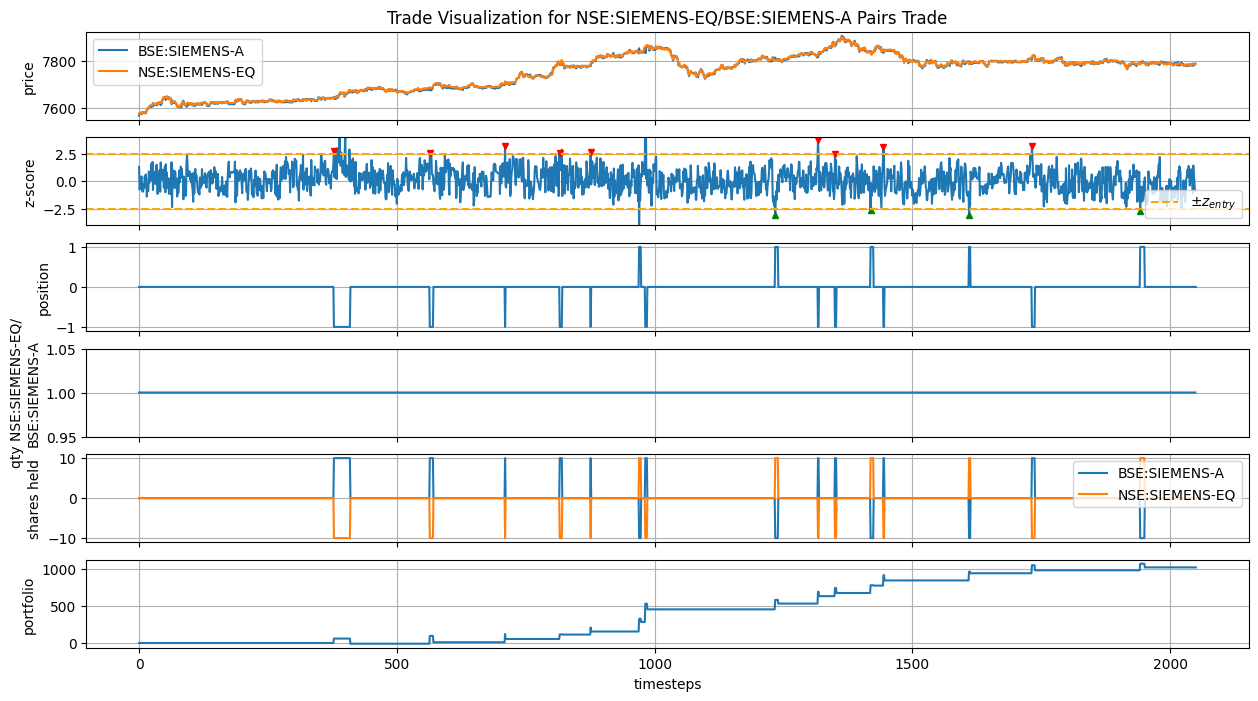

profit = 1025.2793387119998


<Figure size 640x480 with 0 Axes>

In [83]:
# Visualise the trade

fig, axs = plt.subplots(nrows = 6, ncols = 1, figsize=(15, 8), sharex=True)

axs[0].plot(np.array(pairs_data.iloc[window:][asset_a]), label=f'{asset_a}')
axs[0].plot(np.array(pairs_data.iloc[window:][asset_b]), label=f'{asset_b}')
axs[0].set_ylabel('price')
axs[0].set_title(f"Trade Visualization for {asset_b}/{asset_a} Pairs Trade")
axs[0].grid(True)
axs[0].legend()

axs[1].plot(z_scores)
if buy_signals.shape[0]>0:
    axs[1].plot(buy_signals, z_scores[buy_signals], marker='^', c='green', ls='', markersize=4)
if sell_signals.shape[0]>0:
    axs[1].plot(sell_signals, z_scores[sell_signals], marker='v', c='red', ls='', markersize=4)
axs[1].axhline(z_entry, c='orange', ls='--', label='$\pm z_{entry}$')
axs[1].axhline(-z_entry, c='orange', ls='--')
axs[1].legend(loc='lower right')
axs[1].set_ylabel('z-score')
axs[1].set_ylim([-4, 4])
axs[1].grid(True)

axs[2].plot(positions)
axs[2].set_ylabel('position')
axs[2].grid(True)

axs[3].plot(hedge_ratios)
axs[3].set_ylabel(f'qty {asset_b}/\n{asset_a}')
axs[3].set_ylim([np.min(hedge_ratios), np.max(hedge_ratios)])
axs[3].grid(True)

axs[4].plot(shares_a_history, label=asset_a)
axs[4].plot(shares_b_history, label=asset_b)
axs[4].grid(True)
axs[4].set_ylabel('shares held')
axs[4].legend()

axs[5].plot(portfolio_history)
axs[5].set_ylabel('portfolio')
axs[5].grid(True)
axs[5].set_xlabel('timesteps')

plt.show()
plt.tight_layout()

print(f"profit = {portfolio_history[-1]}")

